<h1>ASAN-DOPOLLOS</h1>

# Imports

First we must import the required libraries and datasets that will be needed

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Import datasets
network = pd.read_csv('network.csv')
inspections = pd.read_csv('inspections.csv')
pipes = pd.read_csv('sample_submission.csv')

# Data cleaning

### Merging all datasets

In [2]:
network

,PipeId,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,489616,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False
1,489645,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.0,2.080,0.4,0,0,False
2,489646,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.0,111.173,0.4,3,0,False
3,519950,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,200.0,14.304,0.4,0,0,False
4,1332439,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,160.0,22.669,0.4,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1446534,416536087,La Rioja,Baños de Rio Tobia,2011,AO,Gas natural,50.8,0.454,45.0,0,0,False
1446535,416536416,La Rioja,Baños de Rio Tobia,2011,AO,Gas natural,101.6,0.478,45.0,0,0,False
1446536,416536438,La Rioja,Baños de Rio Tobia,2011,AO,Gas natural,101.6,0.485,45.0,0,0,False
1446537,416536460,La Rioja,Baños de Rio Tobia,2011,AO,Gas natural,50.8,0.210,45.0,0,0,False


In [3]:
inspections

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0
1,188889914,ZRV-00001406,2010,2010-10-01,22,4,0
2,188889907,ZRV-00001406,2010,2010-10-01,22,4,0
3,188673355,ZRV-00001406,2010,2010-10-01,22,4,0
4,188558922,ZRV-00001406,2010,2010-10-01,22,4,0
...,...,...,...,...,...,...,...
6345339,280560178,ZRV-00002112,2021,2020-12-31,23,4,0
6345340,274990683,ZRV-00002112,2021,2020-12-31,23,4,0
6345341,280560172,ZRV-00002112,2021,2020-12-31,23,4,0
6345342,274990921,ZRV-00002112,2021,2020-12-31,23,4,0


In [4]:
pipes

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0
...,...,...
909728,235426649,0
909729,235426673,0
909730,235426707,0
909731,190956601,0


We merge both dataframes by pipeId field

At the end we will need to keep only the pipes of interest (the ones from the sample submission)

In [5]:
# Merge both dataframes
df = inspections.merge(
                        network,
                        how = 'inner',
                        on=['PipeId'] 
                        )

df

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,False
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,False
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,True
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,False


In [6]:
# df.iloc[df["MaintenanceId"][-4:] != 'ERCA']
df[df['MaintenanceId'].str.contains("ERCA")]

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
5584196,6105828,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,1.565,4.0,0,0,False
5584201,6105892,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,63.0,1.641,4.0,0,0,False
5584216,6106206,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,7.963,4.0,0,0,False
5584221,6106007,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,86.924,4.0,8,0,False
5584226,6105987,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,2.019,4.0,0,0,False
5584231,6105936,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,14.654,4.0,2,0,False
5584236,6105935,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,1.476,4.0,0,0,False
5584263,6105895,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,1.790,4.0,0,0,False
5584268,6106216,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,45.857,4.0,0,0,False
5584273,6120321,GLP-020-24 URB LA CERCA,2013,2013-08-06,7,4,0,León,Camponaraya,2013,PE,Gas natural,40.0,385.748,4.0,26,0,False


In [7]:
# Remove maintenance Ids that dont follow the standard of the rest (its only 13 in 6+ million)
df = df.drop(df[df['MaintenanceId'].str.contains("CERCA")].index)
df

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,False
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,False
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,True
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,False


### Useful and unuseful columns

In [8]:
len(df.MaintenanceId.unique())

4178

We will keep the las 4 identifiers of the maintenance ID, and modify the value to keep the maintenance ID from the previous inspection

In [9]:
maintenance_ids = []

for ind in df.index:
    maintenance_ids.append(df['MaintenanceId'][ind][-4:])

df['MaintenanceId'] = maintenance_ids

df

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,1972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
1,189311802,1972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
2,189311802,1972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
3,189311802,1972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
4,189311802,1972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,4581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,False
6345340,56907425,4581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,False
6345341,7843615,2112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,True
6345342,56922456,4581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,False


We are going to drop the Province and Town columns since this is the first aproximation and its 4000 to hot encode. The numconnectionsunder and inspectionyear will also be deleted since they have to correlation. One hot encoding of the rest

In [10]:
df = df.drop(['Province','Town','NumConnectionsUnder','InspectionYear'],axis=1)
df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,BoolBridle
0,189311802,1972,2010-10-01,24,4,0,2001,PE,Gas natural,160.0,117.831,4.000,0,False
1,189311802,1972,2012-10-01,24,4,0,2001,PE,Gas natural,160.0,117.831,4.000,0,False
2,189311802,1972,2014-10-08,24,4,0,2001,PE,Gas natural,160.0,117.831,4.000,0,False
3,189311802,1972,2016-10-14,24,4,0,2001,PE,Gas natural,160.0,117.831,4.000,0,False
4,189311802,1972,2018-10-09,24,4,0,2001,PE,Gas natural,160.0,117.831,4.000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,4581,2020-12-31,24,4,0,1993,PE,Gas natural,63.0,1.237,4.000,0,False
6345340,56907425,4581,2020-12-31,24,4,0,2000,PE,Gas natural,160.0,169.732,4.000,1,False
6345341,7843615,2112,2020-12-31,24,4,0,1995,FD,Gas natural,150.0,0.361,0.025,0,True
6345342,56922456,4581,2020-12-31,24,4,0,1993,PE,Gas natural,63.0,23.306,4.000,0,False


### Modifying values

In [11]:
df = pd.get_dummies(df)
df

: 

: 

We will change the severity from 1-4 into categorical values instead of numbers

In [ ]:
inverse_sev = {4:0,3:1,2:2,1:3}
list = []
for sev in df["Severity"]:
    list.append(inverse_sev[sev]) 

df['Severity'] = list
df

In [ ]:
for column in ['Diameter', 'Length', 'Pressure']:
   df[column] = (df[column] - df[column].mean()) / df[column].std()

df.head()

,PipeId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,...,Material_FG,Material_FI,Material_FO,Material_PA,Material_PE,Material_PN,Material_PV,Material_ZD,GasType_Gas natural,GasType_Gas propano
0,189311802,2010-10-01,24,0,0,2001,0.707022,1.126975,0.166398,0,...,0,0,0,0,1,0,0,0,1,0
1,189311802,2012-10-01,24,0,0,2001,0.707022,1.126975,0.166398,0,...,0,0,0,0,1,0,0,0,1,0
2,189311802,2014-10-08,24,0,0,2001,0.707022,1.126975,0.166398,0,...,0,0,0,0,1,0,0,0,1,0
3,189311802,2016-10-14,24,0,0,2001,0.707022,1.126975,0.166398,0,...,0,0,0,0,1,0,0,0,1,0
4,189311802,2018-10-09,24,0,0,2001,0.707022,1.126975,0.166398,0,...,0,0,0,0,1,0,0,0,1,0


We will change the inspection date to datetime format

In [ ]:
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'])
# df = df.set_index('InspectionDate')
df

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,False
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,False
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,True
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,False


We want to add two new variables:
- PrevSeverity, in order to replace the severity value and avoid having to predict it
- PrevMaintenanceId (same purpose)

In [ ]:
df = df.sort_values(['PipeId','InspectionDate'])
df = df.reset_index(drop=True)
df

KeyboardInterrupt: 

In [ ]:
prev_sev = 0
prev_mid = 0
previous_severity = []
previous_mid = []

for ind in df.index:
    previous_severity.append(prev_sev)
    prev_sev = df['Severity'][ind]
    previous_mid.append(prev_mid)
    prev_mid = df['MaintenanceId'][ind]

df['PrevSeverity'] = previous_severity
df['PrevMaintenanceId'] = previous_mid

df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,Material_FO,Material_PA,Material_PE,Material_PN,Material_PV,Material_ZD,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,0
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573


Now we must remove the first revision of each pipe since we dont have information on the previous severity

In [ ]:
df[df.groupby('PipeId').cumcount() == 0]['PrevSeverity'] = 0
df[df.groupby('PipeId').cumcount() == 0]['PrevMaintenanceId'] = 2121
df

/var/folders/3r/758w4vtn021czdj98l7pl_pc0000gn/T/ipykernel_43333/2849337527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.groupby('PipeId').cumcount() == 0]['PrevSeverity'] = 0
/var/folders/3r/758w4vtn021czdj98l7pl_pc0000gn/T/ipykernel_43333/2849337527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.groupby('PipeId').cumcount() == 0]['PrevMaintenanceId'] = 2121


,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,Material_FO,Material_PA,Material_PE,Material_PN,Material_PV,Material_ZD,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,0
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,0,1,0,0,0,1,0,0,3385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,0,1,0,0,0,1,0,0,1573


The age of the pipe could be of interest too

In [ ]:
age_list = []

for ind in df.index:
    age = int(df['InspectionDate'][ind].year - df['YearBuilt'][ind])
    age_list.append(age)

df['Age'] = age_list

df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,Material_PA,Material_PE,Material_PN,Material_PV,Material_ZD,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,1,0,0,0,1,0,0,0,1
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,1,0,0,0,1,0,0,3385,3
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,1,0,0,0,1,0,0,3385,5
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,1,0,0,0,1,0,0,3385,6
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,0,1,0,0,0,1,0,0,3385,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,0,1,0,0,0,1,0,0,1573,16
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,1,0,0,0,1,0,0,1573,15
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,1,0,0,0,1,0,0,1573,17
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,0,1,0,0,0,1,0,0,1573,19


Accumulated inspections can be an interesting value aswell

In [ ]:
accum_incidence_list = [df['Incidence'][0]]
incidence_count = df['Incidence'][0]

for ind in range(1, len(df.index)):
    if df['PipeId'][ind] != df['PipeId'][ind-1]:
        incidence_count = 0
    incidence_count = incidence_count + df['Incidence'][ind]
    accum_incidence_list.append(incidence_count)

df['AcumIncidence'] = accum_incidence_list

df


,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,Material_PE,Material_PN,Material_PV,Material_ZD,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age,AcumIncidence
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,1,0,0,0,1,0,0,0,1,0
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,1,0,0,0,1,0,0,3385,3,0
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,1,0,0,0,1,0,0,3385,5,0
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,1,0,0,0,1,0,0,3385,6,0
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,1,0,0,0,1,0,0,3385,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,1,0,0,0,1,0,0,1573,16,0
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,1,0,0,0,1,0,0,1573,15,0
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,1,0,0,0,1,0,0,1573,17,0
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,1,0,0,0,1,0,0,1573,19,0


### Correlations

Code to compute the correlation of the variables

Text(0.5, 1.0, 'Variable correllation with Power consumption')

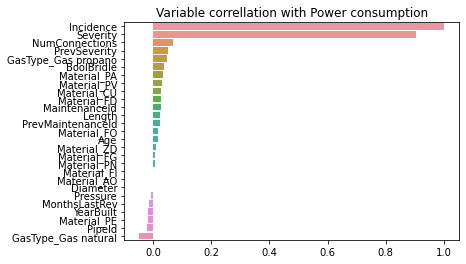

In [ ]:
# Correlation of new columns
correlations = df.corr()['Incidence'].sort_values(ascending=False)
meaningful_vars = []
corr = []
for i in range(len(correlations.index)):
    meaningful_vars.append(correlations.index[i])
    corr.append(correlations[i])
sns.barplot(x=corr, y=meaningful_vars)
plt.title('Variable correllation with Power consumption')

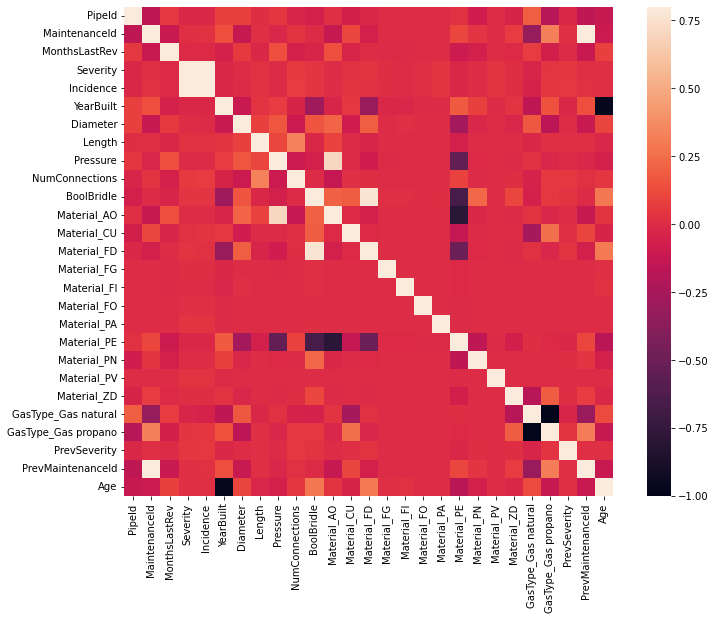

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Most of the materials are not useful in terms of correlation with the incidence. We can get rid of the columns that have less correlation to avoid extra noise in the model

In [ ]:
correlations

Incidence              1.000000
Severity               0.904174
NumConnections         0.068094
PrevSeverity           0.050163
GasType_Gas propano    0.047500
BoolBridle             0.035511
Material_PA            0.032442
Material_PV            0.031169
Material_CU            0.027473
Material_FD            0.025266
MaintenanceId          0.025113
Length                 0.024879
PrevMaintenanceId      0.022911
Material_FO            0.017995
Age                    0.016500
Material_ZD            0.010921
Material_FG            0.007709
Material_PN            0.004479
Material_FI           -0.000150
Material_AO           -0.000601
Diameter              -0.002152
Pressure              -0.007136
MonthsLastRev         -0.013750
YearBuilt             -0.016705
Material_PE           -0.019435
PipeId                -0.021449
GasType_Gas natural   -0.047500
Name: Incidence, dtype: float64

From the list of correlations displayed above, we notice that many of the materials are not important

In [ ]:
df = df.drop(['Material_FI','Material_AO', 'Material_ZD', 'Material_FG', 'Material_PN', 'Material_FO', 'Material_PV'],axis=1)
df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,0,1
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,3
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,5
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,6
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,False,0,0,0,1,1,0,0,1573,16
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,15
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,17
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,19


### Balancing data

First, we must check if the dataset is or not unbalanced.

In [ ]:
# First we check how balanced is the dataset
Incidence = df[df.Incidence == 1]
not_Incidence = df[df.Incidence == 0]

print(len(Incidence))
print(len(not_Incidence))

12328
6333003


The dataset is unbalanced, and because of this we must balance it by undersampling. Otherwise, the unbalance will affect negatively to the result of our predictions.

In [ ]:
# index property contains the indexes of the not_Incidence dataset
not_Incidence_indexes = not_Incidence.index

# get as many not_incidence indexes (randomly) as incidence occurrences
np.random.seed(42)
random_not_Incidence_indexes = np.random.choice(not_Incidence_indexes, 200*len(Incidence))

# Keep those entries in not_Incidence
not_Incidence = df.loc[random_not_Incidence_indexes]

# We will form the balanced dataset concatenating Incidence and not_Incidence
balanced_df = Incidence.append(not_Incidence)
balanced_df.sort_index()

# Check the result
print(len(balanced_df[balanced_df.Incidence == 1]))
print(len(balanced_df[balanced_df.Incidence == 0]))

/var/folders/3r/758w4vtn021czdj98l7pl_pc0000gn/T/ipykernel_43333/1537226748.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = Incidence.append(not_Incidence)


12328
2465600


In [ ]:
df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age
0,489616,3385,2013-05-08,16,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,0,1
1,489616,3385,2015-03-04,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,3
2,489616,3385,2017-01-12,22,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,5
3,489616,3385,2018-12-19,23,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,6
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,False,0,0,0,1,1,0,0,1573,16
6345327,451995309,1573,2013-10-07,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,15
6345328,451995309,1573,2015-10-05,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,17
6345329,451995309,1573,2017-10-02,24,0,0,1998,1.406150,0.771961,-0.419374,...,False,0,0,0,1,1,0,0,1573,19


# Prepare prediction dataset

In [ ]:
pipes = pipes.drop(['Incidence'],axis=1)
pred_X = network.merge(
                pipes,
                how='inner',
                on=['PipeId']
)
pred_X

,PipeId,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,489780,Toledo,Añover de Tajo,2009,PE,Gas natural,110.0,7.485,5.0,0,0,False
1,489790,Toledo,Añover de Tajo,2012,PE,Gas natural,110.0,4.436,4.0,0,0,False
2,489792,Toledo,Añover de Tajo,2012,PE,Gas natural,110.0,11.769,4.0,1,0,False
3,489793,Toledo,Añover de Tajo,2012,PE,Gas natural,110.0,6.172,4.0,1,0,False
4,489981,Toledo,Añover de Tajo,2012,PE,Gas natural,110.0,49.031,4.0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,La Rioja,Cirueña,2011,AO,Gas natural,50.8,0.460,45.0,0,0,False
909729,416223471,La Rioja,Cirueña,2011,AO,Gas natural,50.8,0.230,45.0,0,0,False
909730,416425646,La Rioja,Nájera,2011,AO,Gas natural,254.0,1.999,45.0,0,0,False
909731,416425691,La Rioja,Nájera,2011,AO,Gas natural,254.0,3.000,45.0,0,0,False


In [ ]:
pred_X = pred_X.drop(['Province', 'Town', 'NumConnectionsUnder'],axis=1)
pred_X

,PipeId,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,BoolBridle
0,489780,2009,PE,Gas natural,110.0,7.485,5.0,0,False
1,489790,2012,PE,Gas natural,110.0,4.436,4.0,0,False
2,489792,2012,PE,Gas natural,110.0,11.769,4.0,1,False
3,489793,2012,PE,Gas natural,110.0,6.172,4.0,1,False
4,489981,2012,PE,Gas natural,110.0,49.031,4.0,0,False
...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,AO,Gas natural,50.8,0.460,45.0,0,False
909729,416223471,2011,AO,Gas natural,50.8,0.230,45.0,0,False
909730,416425646,2011,AO,Gas natural,254.0,1.999,45.0,0,False
909731,416425691,2011,AO,Gas natural,254.0,3.000,45.0,0,False


In [ ]:
# Normalization

for column in ['Diameter', 'Length', 'Pressure']:
   pred_X[column] = (pred_X[column] - pred_X[column].mean()) / pred_X[column].std()

# Encoding

pred_X = pd.get_dummies(pred_X)

pred_X

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_AO,Material_CU,Material_FD,Material_FG,Material_FI,Material_PA,Material_PE,Material_PN,Material_ZD,GasType_Gas natural,GasType_Gas propano
0,489780,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,0,0,0,1,0,0,1,0
1,489790,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,0,0,0,1,0,0,1,0
2,489792,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,0,0,0,1,0,0,1,0
3,489793,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,0,0,0,1,0,0,1,0
4,489981,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,-1.138929,-0.516547,7.235145,0,False,1,0,0,0,0,0,0,0,0,1,0
909729,416223471,2011,-1.138929,-0.519670,7.235145,0,False,1,0,0,0,0,0,0,0,0,1,0
909730,416425646,2011,2.385941,-0.495651,7.235145,0,False,1,0,0,0,0,0,0,0,0,1,0
909731,416425691,2011,2.385941,-0.482059,7.235145,0,False,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
pred_X = pred_X.drop(['Material_AO', 'Material_FG', 'Material_FI', 'Material_ZD', 'Material_PN'], axis=1)

In [ ]:
sev_df = df.drop_duplicates(subset=['PipeId'], keep='last')
sev_df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age
4,489616,3385,2020-12-05,24,0,0,2012,-0.988362,-0.398361,-0.381337,...,False,0,0,0,1,1,0,0,3385,8
9,489645,3385,2020-12-05,24,0,0,2012,-0.516451,-0.477539,-0.381337,...,False,0,0,0,1,1,0,0,3385,8
14,489646,3385,2020-12-05,24,0,0,2012,-0.516451,1.034683,-0.381337,...,False,0,0,0,1,1,0,0,3385,8
19,489780,3357,2020-04-18,24,0,0,2009,-0.166887,-0.402616,0.318546,...,False,0,0,0,1,1,0,0,3357,11
24,489790,3357,2020-04-18,24,0,0,2012,-0.166887,-0.444881,0.166398,...,False,0,0,0,1,1,0,0,3357,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345315,451195430,4004,2019-01-03,24,0,0,2012,0.707022,1.308329,-0.419374,...,False,0,0,0,1,1,0,0,4004,7
6345319,451195580,4004,2019-01-02,24,0,0,1950,0.707022,0.088229,-0.419374,...,False,0,0,0,1,1,0,0,4004,69
6345322,451995254,1573,2019-10-24,48,0,0,2010,-0.516451,-0.505069,-0.419374,...,False,0,0,0,1,1,0,0,1573,9
6345326,451995260,1573,2019-10-23,24,0,0,2003,-0.516451,0.426304,-0.419374,...,False,0,0,0,1,1,0,0,1573,16


In [ ]:
# applying merge with more parameters
pred_X = pred_X.merge(sev_df[['PipeId', 'Severity', 'MaintenanceId', 'AcumIncidence']], on = 'PipeId', how = 'left')
pred_X

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,Severity,MaintenanceId
0,489780,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0.0,3357.0
1,489790,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0.0,3357.0
2,489792,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0.0,3357.0
3,489793,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0.0,3357.0
4,489981,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0.0,3357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,NaN,NaN
909729,416223471,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,NaN,NaN
909730,416425646,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0.0,5071.0
909731,416425691,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0.0,5071.0


Replace NaN values with zeros and change severity for previous severity

In [ ]:
# Replace NaN values
pred_X['Severity'] = pred_X['Severity'].replace(np.nan, 0)
pred_X['MaintenanceId'] = pred_X['MaintenanceId'].replace(np.nan, 2121)

# Rename column
pred_X.rename(columns = {'Severity':'PrevSeverity', 'MaintenanceId': 'PrevMaintenanceId'}, inplace = True)

pred_X

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId
0,489780,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0.0,3357.0
1,489790,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0.0,3357.0
2,489792,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0.0,3357.0
3,489793,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0.0,3357.0
4,489981,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0.0,3357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0.0,2121.0
909729,416223471,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0.0,2121.0
909730,416425646,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0.0,5071.0
909731,416425691,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0.0,5071.0


In [ ]:
pred_X['PrevSeverity'] = pred_X['PrevSeverity'].astype('int')
pred_X['PrevMaintenanceId'] = pred_X['PrevMaintenanceId'].astype('int')
pred_X['AcumIncidence'] = pred_X['AcumIncidence'].astype('int')

pred_X

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId
0,489780,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357
1,489790,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357
2,489792,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357
3,489793,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357
4,489981,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121
909729,416223471,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121
909730,416425646,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071
909731,416425691,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071


# Training and testing


Training and test to predict severity

In [ ]:
# # Separate data from target
# y2 = balanced_df['Incidence']
# y1 = balanced_df['MonthsLastRev']
# X = balanced_df.copy()
# X = X.drop(['Incidence','MonthsLastRev','InspectionDate', 'PipeId', 'Severity'], axis=1)
# X


In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=0)


# forecaster = GradientBoostingClassifier()
# forecaster.fit(X_train,y_train)
# prediction = forecaster.predict(X_test)
# print(metrics.roc_auc_score(y_test,prediction))

In [ ]:

# X['MonthsLastRev'] = y1
# X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.33, random_state=0)


# forecaster = GradientBoostingClassifier()
# forecaster.fit(X_train,y_train)
# prediction = forecaster.predict(X_test)
# print(metrics.roc_auc_score(y_test,prediction))

In [ ]:
# print(metrics.confusion_matrix(y_test,prediction))

# Submission

In [ ]:
balanced_df

,PipeId,MaintenanceId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,...,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,Age
378,497136,4004,2019-01-25,24,1,1,2008,0.707022,3.917808,-0.419374,...,False,0,0,0,1,1,0,0,4004,11
1141,510311,4575,2012-06-21,17,1,1,2011,-1.390361,0.790647,-0.419374,...,False,0,0,0,1,1,0,0,4606,1
2097,586278,3669,2012-05-01,19,3,1,1970,-1.201596,-0.157564,0.166398,...,True,0,0,0,0,1,0,0,3506,42
2817,634981,3838,2011-02-16,21,1,1,1999,-1.201596,0.554664,1.992181,...,False,0,0,0,0,1,0,0,3838,12
3077,644491,3997,2013-07-30,24,1,1,1989,-0.166887,0.040766,-0.438393,...,False,0,0,0,1,1,0,0,3437,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609540,338330558,2338,2013-04-21,23,0,0,2009,-0.166887,-0.020489,-0.419374,...,False,0,0,0,1,1,0,0,2338,4
1311625,132919866,3658,2013-04-24,24,0,0,1901,-0.988362,0.394810,0.166398,...,False,0,0,0,1,1,0,0,3658,112
987099,45851019,4075,2018-03-22,23,0,0,1996,-0.516451,1.121832,0.166398,...,False,0,0,0,1,1,0,0,4075,22
4725515,297280994,3890,2018-07-12,24,0,0,1997,-0.988362,-0.497279,0.166398,...,False,0,0,0,1,1,0,0,3890,21


In [ ]:
pred_X

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId
0,489780,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357
1,489790,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357
2,489792,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357
3,489793,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357
4,489981,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,416223449,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121
909729,416223471,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121
909730,416425646,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071
909731,416425691,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071


In [ ]:
pipe_id_list = pred_X['PipeId']
pred_X = pred_X.drop(['PipeId'], axis=1) #X for testing

y_learner1 = balanced_df['MonthsLastRev'] #Train 1
y_learner2 = balanced_df['Incidence'] # Train 2
X_learner1 = balanced_df.drop(['PipeId', 'InspectionDate', 'Severity', 'MaintenanceId', 'MonthsLastRev', 'Incidence', 'Age'], axis=1) # X train 1

In [ ]:
forecaster = GradientBoostingRegressor()
forecaster.fit(X_learner1, y_learner1)
Months_pred = forecaster.predict(pred_X)

In [ ]:
X_learner2 = X_learner1.copy()
X_learner2['MonthsLastRev'] = balanced_df['MonthsLastRev']
X_learner2['InspectionDate'] = balanced_df['InspectionDate']
X_learner2['Age'] = balanced_df['Age']

pred_X['MonthsLastRev'] = Months_pred
pred_X['MonthsLastRev'] = pred_X['MonthsLastRev'].astype(int)

pred_X

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev
0,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357,23
1,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357,22
2,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357,22
3,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357,22
4,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121,36
909729,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121,36
909730,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071,26
909731,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071,24


In [ ]:
X_learner2

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,InspectionDate,Age
378,2008,0.707022,3.917808,-0.419374,11,False,0,0,0,1,1,0,0,4004,24,2019-01-25,11
1141,2011,-1.390361,0.790647,-0.419374,6,False,0,0,0,1,1,0,0,4606,17,2012-06-21,1
2097,1970,-1.201596,-0.157564,0.166398,0,True,0,0,0,0,1,0,0,3506,19,2012-05-01,42
2817,1999,-1.201596,0.554664,1.992181,0,False,0,0,0,0,1,0,0,3838,21,2011-02-16,12
3077,1989,-0.166887,0.040766,-0.438393,2,False,0,0,0,1,1,0,0,3437,24,2013-07-30,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609540,2009,-0.166887,-0.020489,-0.419374,0,False,0,0,0,1,1,0,0,2338,23,2013-04-21,4
1311625,1901,-0.988362,0.394810,0.166398,3,False,0,0,0,1,1,0,0,3658,24,2013-04-24,112
987099,1996,-0.516451,1.121832,0.166398,1,False,0,0,0,1,1,0,0,4075,23,2018-03-22,22
4725515,1997,-0.988362,-0.497279,0.166398,1,False,0,0,0,1,1,0,0,3890,24,2018-07-12,21


In [ ]:
pred_X['PipeId'] = pipe_id_list
pred_X = pred_X.merge(sev_df[['PipeId', 'InspectionDate']], on = 'PipeId', how = 'left')
pred_X = pred_X.drop(['PipeId'], axis=1)

# Adding the newly predicted inspection dates
new_dates = []

for ind in pred_X.index:
    new_date = pred_X['InspectionDate'][ind]+pd.DateOffset(months=pred_X['MonthsLastRev'][ind])
    new_dates.append(new_date)

pred_X['InspectionDate'] = new_dates

pred_X

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,InspectionDate
0,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357,23,2022-03-18
1,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18
2,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18
3,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18
4,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121,36,NaT
909729,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121,36,NaT
909730,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071,26,2019-10-10
909731,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071,24,2019-08-09


Fix NaT values in Inspection Date

In [ ]:
# Replace NaT values
pred_X['InspectionDate'] = pred_X['InspectionDate'].replace(pd.NaT, pd.to_datetime('2022-12-31'))

pred_X

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,InspectionDate
0,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357,23,2022-03-18
1,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18
2,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18
3,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18
4,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121,36,2022-12-31
909729,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121,36,2022-12-31
909730,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071,26,2019-10-10
909731,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071,24,2019-08-09


In [ ]:
# Adding the newly predicted age
age_list = []

for ind in pred_X.index:
    age = int(pred_X['InspectionDate'][ind].year - pred_X['YearBuilt'][ind])
    age_list.append(age)

pred_X['Age'] = age_list

pred_X

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,InspectionDate,Age
0,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357,23,2022-03-18,13
1,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18,10
2,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18,10
3,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357,22,2022-02-18,10
4,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357,22,2022-02-18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121,36,2022-12-31,11
909729,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121,36,2022-12-31,11
909730,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071,26,2019-10-10,8
909731,2011,2.385941,-0.482059,7.235145,0,False,0,0,0,0,1,0,0,5071,24,2019-08-09,8


Set dates in the index position

In [ ]:
X_learner2 = X_learner2.set_index(['InspectionDate'])
pred_X = pred_X.set_index(['InspectionDate'])

pred_X

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,Age
InspectionDate,,,,,,,,,,,,,,,,
2022-03-18,2009,-0.111998,-0.421161,0.387956,0,False,0,0,0,1,1,0,0,3357,23,13
2022-02-18,2012,-0.111998,-0.462561,0.216777,0,False,0,0,0,1,1,0,0,3357,22,10
2022-02-18,2012,-0.111998,-0.362993,0.216777,1,False,0,0,0,1,1,0,0,3357,22,10
2022-02-18,2012,-0.111998,-0.438989,0.216777,1,False,0,0,0,1,1,0,0,3357,22,10
2022-02-18,2012,-0.111998,0.142952,0.216777,0,False,0,0,0,1,1,0,0,3357,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2011,-1.138929,-0.516547,7.235145,0,False,0,0,0,0,1,0,0,2121,36,11
2022-12-31,2011,-1.138929,-0.519670,7.235145,0,False,0,0,0,0,1,0,0,2121,36,11
2019-10-10,2011,2.385941,-0.495651,7.235145,0,False,0,0,0,0,1,0,0,5071,26,8


In [ ]:
X_learner2

,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,Material_CU,Material_FD,Material_PA,Material_PE,GasType_Gas natural,GasType_Gas propano,PrevSeverity,PrevMaintenanceId,MonthsLastRev,Age
InspectionDate,,,,,,,,,,,,,,,,
2019-01-25,2008,0.707022,3.917808,-0.419374,11,False,0,0,0,1,1,0,0,4004,24,11
2012-06-21,2011,-1.390361,0.790647,-0.419374,6,False,0,0,0,1,1,0,0,4606,17,1
2012-05-01,1970,-1.201596,-0.157564,0.166398,0,True,0,0,0,0,1,0,0,3506,19,42
2011-02-16,1999,-1.201596,0.554664,1.992181,0,False,0,0,0,0,1,0,0,3838,21,12
2013-07-30,1989,-0.166887,0.040766,-0.438393,2,False,0,0,0,1,1,0,0,3437,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-21,2009,-0.166887,-0.020489,-0.419374,0,False,0,0,0,1,1,0,0,2338,23,4
2013-04-24,1901,-0.988362,0.394810,0.166398,3,False,0,0,0,1,1,0,0,3658,24,112
2018-03-22,1996,-0.516451,1.121832,0.166398,1,False,0,0,0,1,1,0,0,4075,23,22


In [ ]:
forecaster = GaussianNB()
forecaster.fit(X_learner2, y_learner2)
Incidence_pred = forecaster.predict(pred_X)

In [ ]:
pipos = pd.DataFrame()
pipos['PipeId'] = pipe_id_list
pipos['Incidence'] = Incidence_pred
pipos

,PipeId,Incidence
0,489780,0
1,489790,0
2,489792,0
3,489793,0
4,489981,0
...,...,...
909728,416223449,0
909729,416223471,0
909730,416425646,0
909731,416425691,0


In [ ]:
# Check the result
print(len(pipos[pipos.Incidence == 1]))
print(len(pipos[pipos.Incidence == 0]))
# 82532

83226
826507


In [ ]:
export = pipes.merge(pipos[['PipeId', 'Incidence']], on = 'PipeId', how = 'left')

In [ ]:
export

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,1
...,...,...
909728,235426649,0
909729,235426673,0
909730,235426707,0
909731,190956601,0


In [ ]:
export.to_csv('Asan-Dopollos.csv', index=False)